In [22]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt

In [23]:
cols=["fLength","fWidth","fSize","fConc","fConc1","fAsym","fM3Long","fM3Trans","fAlpha","fDist","class"]
df=pd.read_csv("magic04.data",names=cols)

In [24]:
df.head()

,fLength,fWidth,fSize,fConc,fConc1,fAsym,fM3Long,fM3Trans,fAlpha,fDist,class
0,28.7967,16.0021,2.6449,0.3918,0.1982,27.7004,22.0110,-8.2027,40.0920,81.8828,g
1,31.6036,11.7235,2.5185,0.5303,0.3773,26.2722,23.8238,-9.9574,6.3609,205.2610,g
2,162.0520,136.0310,4.0612,0.0374,0.0187,116.7410,-64.8580,-45.2160,76.9600,256.7880,g
3,23.8172,9.5728,2.3385,0.6147,0.3922,27.2107,-6.4633,-7.1513,10.4490,116.7370,g
4,75.1362,30.9205,3.1611,0.3168,0.1832,-5.5277,28.5525,21.8393,4.6480,356.4620,g


In [25]:
df["class"].unique() # to check unique or distinct values

array(['g', 'h'], dtype=object)

In [26]:
# converting "class" column from string to integer 
df["class"]=(df["class"]=="g").astype(int)

In [27]:
df

,fLength,fWidth,fSize,fConc,fConc1,fAsym,fM3Long,fM3Trans,fAlpha,fDist,class
0,28.7967,16.0021,2.6449,0.3918,0.1982,27.7004,22.0110,-8.2027,40.0920,81.8828,1
1,31.6036,11.7235,2.5185,0.5303,0.3773,26.2722,23.8238,-9.9574,6.3609,205.2610,1
2,162.0520,136.0310,4.0612,0.0374,0.0187,116.7410,-64.8580,-45.2160,76.9600,256.7880,1
3,23.8172,9.5728,2.3385,0.6147,0.3922,27.2107,-6.4633,-7.1513,10.4490,116.7370,1
4,75.1362,30.9205,3.1611,0.3168,0.1832,-5.5277,28.5525,21.8393,4.6480,356.4620,1
...,...,...,...,...,...,...,...,...,...,...,...
19015,21.3846,10.9170,2.6161,0.5857,0.3934,15.2618,11.5245,2.8766,2.4229,106.8258,0
19016,28.9452,6.7020,2.2672,0.5351,0.2784,37.0816,13.1853,-2.9632,86.7975,247.4560,0
19017,75.4455,47.5305,3.4483,0.1417,0.0549,-9.3561,41.0562,-9.4662,30.2987,256.5166,0
19018,120.5135,76.9018,3.9939,0.0944,0.0683,5.8043,-93.5224,-63.8389,84.6874,408.3166,0


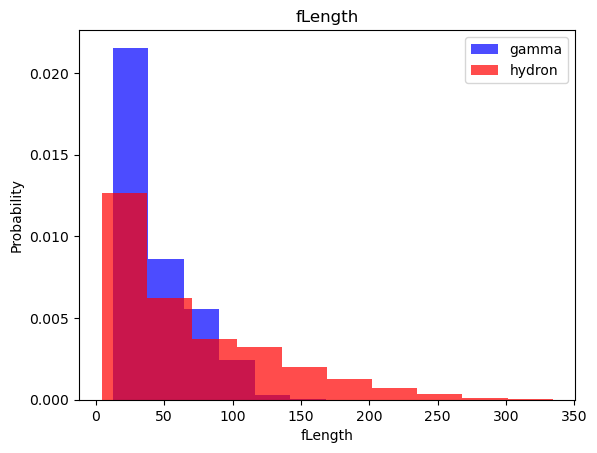

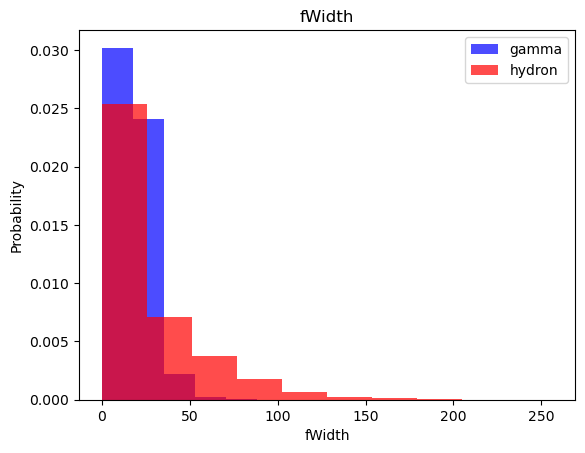

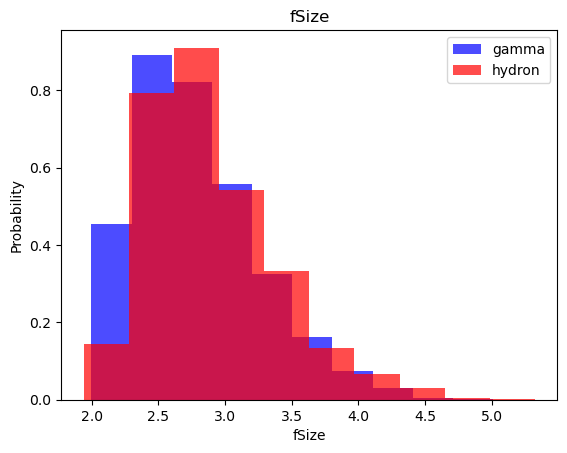

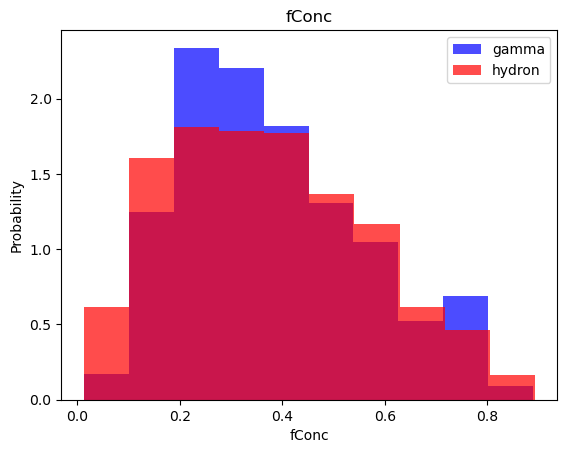

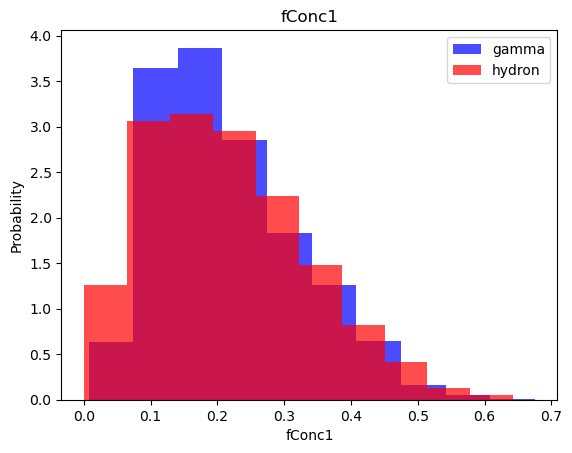

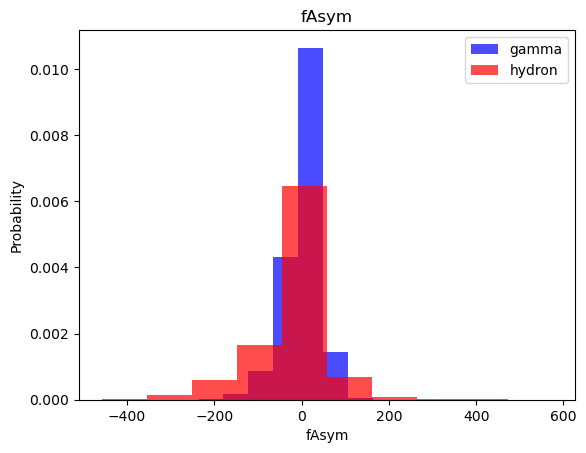

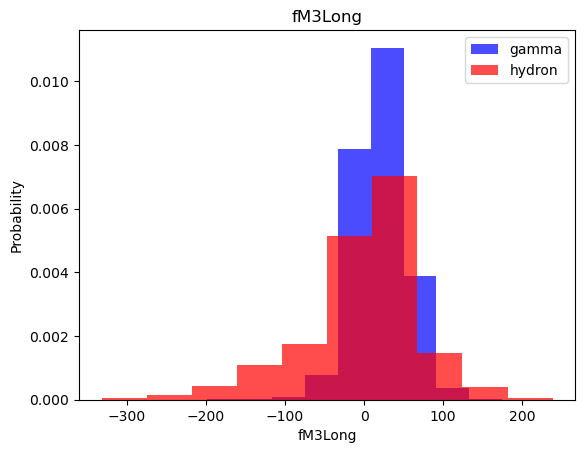

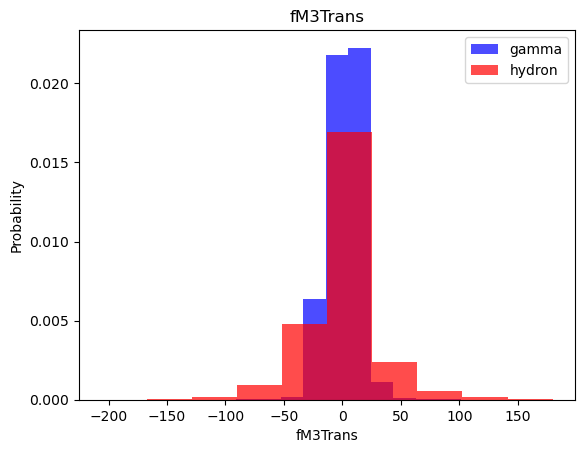

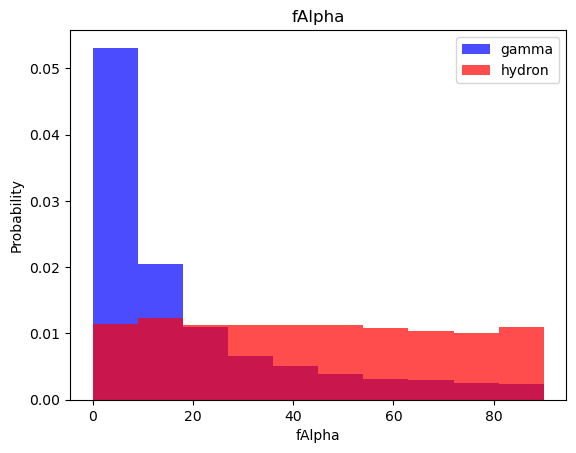

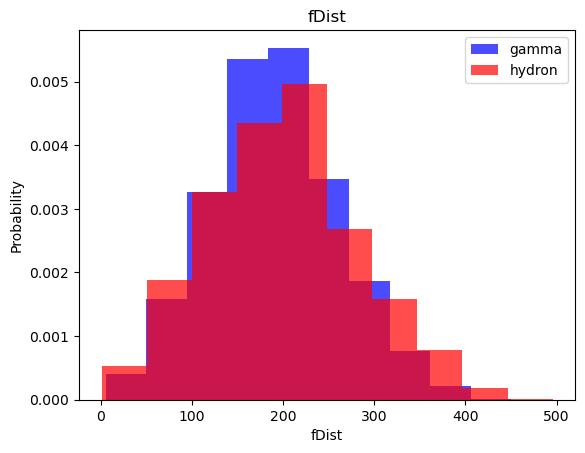

In [28]:
#alpha=.7 means the histogram bars will be drawn with 70% opacity, 
#which allows overlapping elements to be seen more clearly through one another.
#density=True, it changes the y-axis of the histogram to represent a probability density instead of a count of data points.
#If density=False (default), the histogram will show raw counts of data points
#The plt.legend() will display the label 'gamma' and 'hydron'on the plot

for label in cols[:-1]:
    plt.hist(df[df["class"]==1][label],color='blue',label='gamma',alpha=.7,density=True)
    plt.hist(df[df["class"]==0][label],color='red',label='hydron',alpha=.7,density=True)
    plt.title(label)
    plt.ylabel('Probability')
    plt.xlabel(label)
    plt.legend()
    plt.show()

# Train, Validation and Test Dataset

In [123]:
train, valid, test = np.split(df.sample(frac=1),[int(.6*len(df)),int(.8*len(df))])

/opt/anaconda3/lib/python3.11/site-packages/numpy/core/fromnumeric.py:59: FutureWarning: 'DataFrame.swapaxes' is deprecated and will be removed in a future version. Please use 'DataFrame.transpose' instead.
  return bound(*args, **kwds)


# Scaling the data as the column values are different


In [113]:
from sklearn.preprocessing import StandardScaler  

In [31]:
#def scale_dataset(dataframe):
    #x=dataframe[dataframe.cols[:-1]].values # take all the column values except last column
    #x=dataframe[dataframe.cols[-1]].values # take only the last column value i.e.class
    
    #scaler= StandardScaler()
    #x=scaler.fit_transform(x)
    
    #data=np.hstack((x,np.reshape(y,len(y),1))) # as x is 2 D and y is 1 D hence transform 1 D to 2 D
    
    #return data,x,y
    

In [114]:
train

,fLength,fWidth,fSize,fConc,fConc1,fAsym,fM3Long,fM3Trans,fAlpha,fDist,class
12100,20.8725,9.9556,2.3464,0.6306,0.3311,-7.0964,17.4130,-10.9364,39.5600,100.0690,1
10174,20.1664,10.8120,2.2304,0.6294,0.3265,-6.6795,17.3249,5.3727,74.4540,148.0840,1
13525,67.3731,29.9996,3.0715,0.1756,0.0886,-75.8810,-47.1058,-23.4857,50.1910,155.4380,0
15611,20.0680,9.7614,2.3962,0.6145,0.4076,-3.6410,14.7087,9.1117,19.9443,229.2690,0
1023,33.8356,17.0413,2.5922,0.3657,0.2161,11.9870,26.5376,-8.9685,23.1150,178.0940,1
...,...,...,...,...,...,...,...,...,...,...,...
18191,33.0857,19.4052,2.6264,0.4087,0.2226,-10.6070,-14.8030,-13.1350,19.2177,256.7284,0
2172,26.3494,10.2292,2.2978,0.5038,0.2746,10.4962,21.1357,3.9297,43.7230,199.4730,1
13678,34.1189,9.7133,2.5378,0.3884,0.1957,43.0863,27.3881,6.4198,54.8740,156.0320,0
887,68.7920,24.6323,3.6718,0.1550,0.0787,67.4638,54.8721,-15.9332,4.8410,226.3510,1


In [115]:
len(train[train["class"]==1]) # Gamma

7435

In [116]:
len(train[train["class"]==0]) # hydrons

3977

# Oversample Hydrons as the no. of values are less compared to Gammas


In [117]:
from imblearn.over_sampling import RandomOverSampler

In [118]:
def scale_dataset(dataframe, oversample=False):
    x=dataframe[dataframe.columns[:-1]].values # take all the column values except last column
    y=dataframe[dataframe.columns[-1]].values # take only the last column value i.e.class

    scaler= StandardScaler()
    x=scaler.fit_transform(x)

    
    if oversample:
        ros = RandomOverSampler()
        x,y= ros.fit_resample(x,y)
    
    data=np.hstack((x, np.reshape(y,(-1,1)))) # as x is 2 D and y is 1 D hence transform 1 D to 2 D
    
    return data, x, y  

In [119]:
train, x_train, y_train = scale_dataset(train, oversample=True)

In [120]:
sum(y_train==1)

7435

In [121]:
sum(y_train==0)

7435

In [124]:
train, x_train, y_train = scale_dataset(train, oversample=True)
valid, x_valid, y_valid = scale_dataset(valid, oversample=False)
test, x_test, y_test = scale_dataset(test, oversample=False)

# K Nearest Neighbours

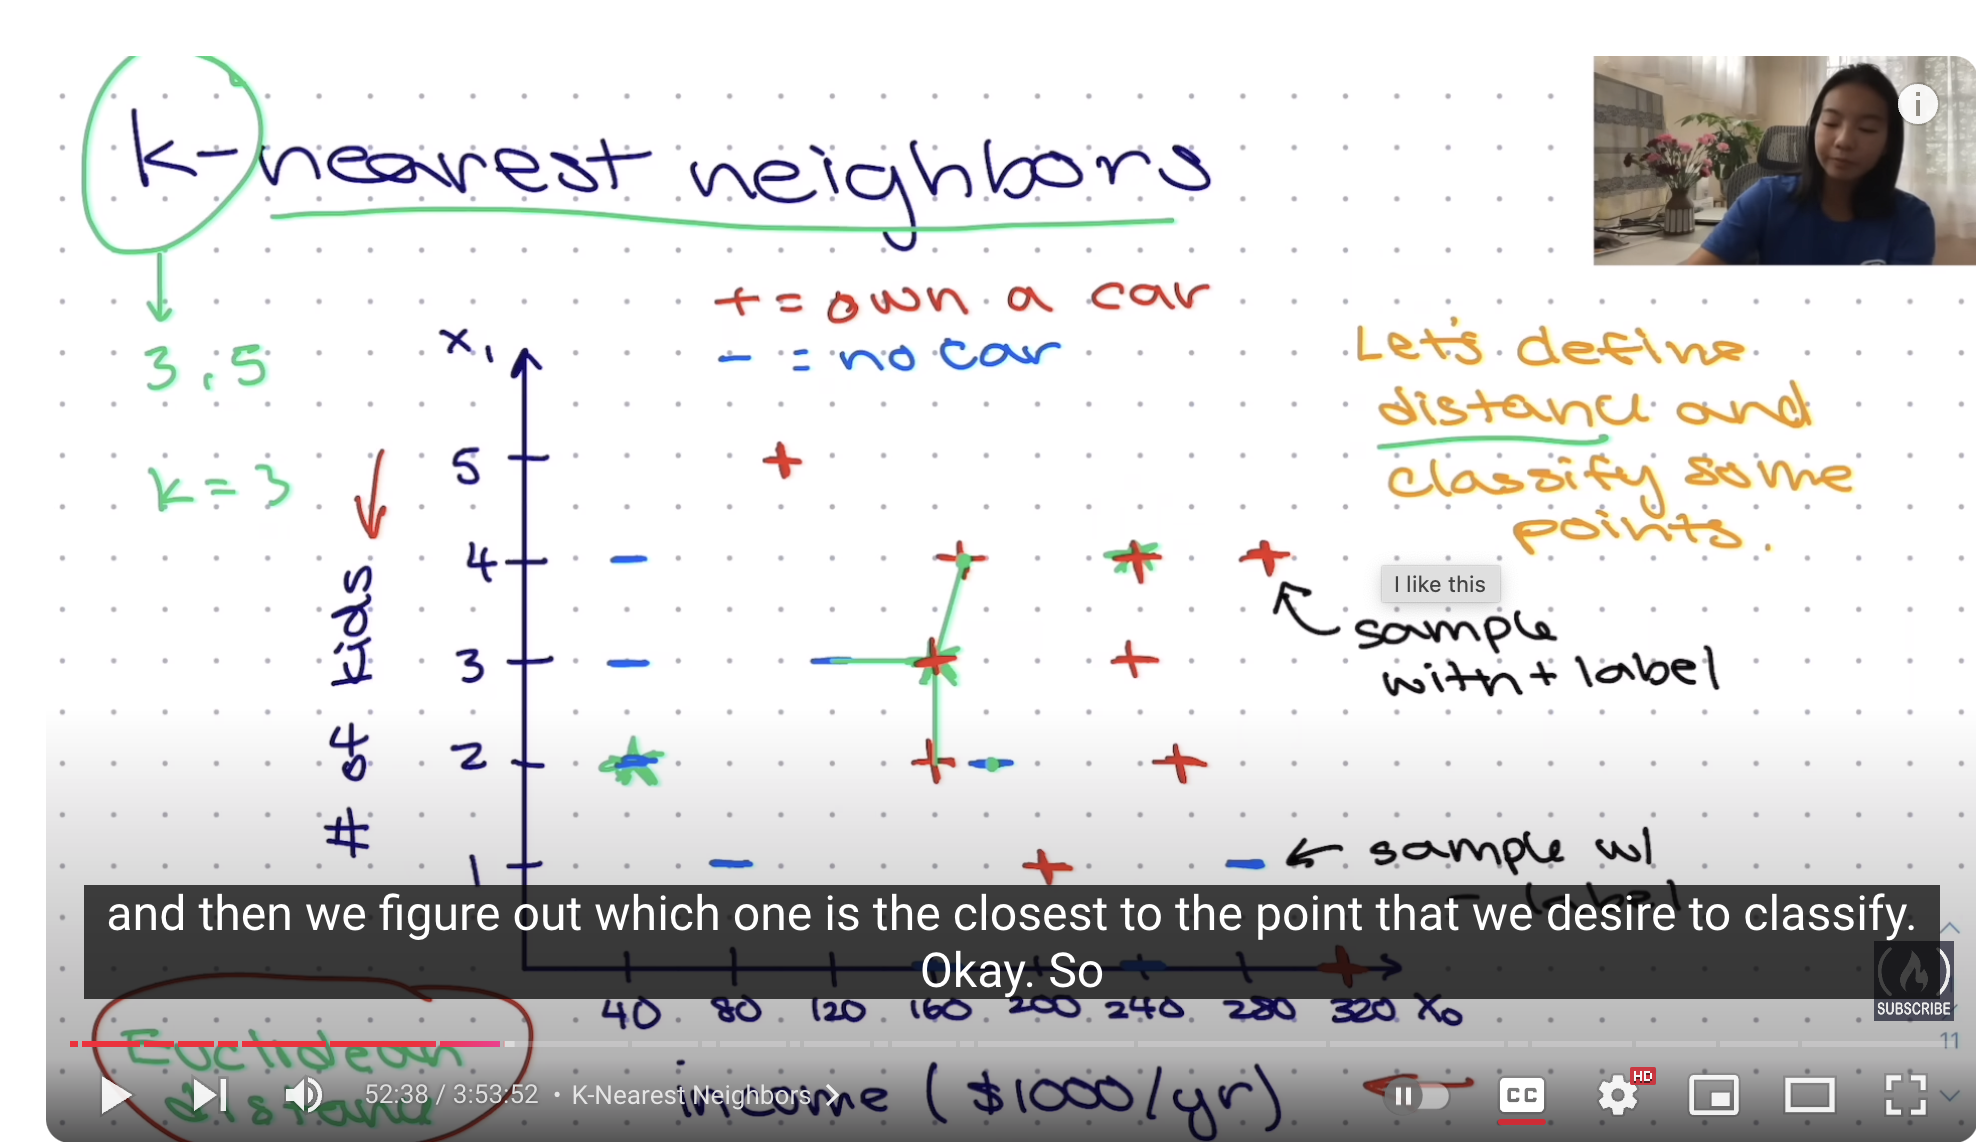